In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import sympy as sy
sy.init_printing() 

In [2]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})

# <font face="gotham" color="purple"> The Gram-Schmidt Process

The <font face="gotham" color="red"> Gram-Schmidt Process </font> is an algorithm of producing an orthogonal or orthonormal basis.

## <font face="gotham" color="purple"> An Example in $\mathbb{R}^3$

$$\text { Let } W=\operatorname{Span}\left\{\mathbf{x}_{1}, \mathbf{x}_{2}, \mathbf{x}_{3}\right\}, \text { where } \mathbf{x}_{1}=\left[\begin{array}{l}
3 \\
6 \\
2
\end{array}\right] \text {, } \mathbf{x}_{2}=\left[\begin{array}{l}
1 \\
2 \\
4
\end{array}\right]\text {, and }\mathbf{x}_{3}=\left[\begin{array}{l}
2 \\
-2 \\
1
\end{array}\right]$$.

They are not orthogonal, but we can construct an orthogonal basis $\{\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3\}$ for $W$ based on $\left\{\mathbf{x}_{1}, \mathbf{x}_{2}, \mathbf{x}_{3}\right\}$. We will visualize the process.

First we plot the $W=\operatorname{Span}\left\{\mathbf{x}_{1}, \mathbf{x}_{2},\mathbf{x}_{3}\right\}$.

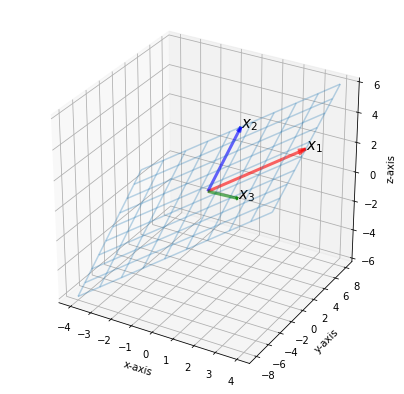

In [4]:
######################## Subspace W ##############################
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

vec = np.array([[[0,0,0,3, 6, 2]],
             [[0,0,0,1, 2, 4]],
             [[0,0,0,2, -2, 1]]])

X = vec[0,:,3] * S + vec[1,:,3] * T
Y = vec[0,:,4] * S + vec[1,:,4] * T
Z = vec[0,:,5] * S + vec[1,:,5] * T

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1 and x2 ##############################
colors = ['r','b','g']
s = ['$x_1$', '$x_2$', '$x_3$']
for i in range(vec.shape[0]):
    X,Y,Z,U,V,W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False,
              color = colors[i], alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3)
    ax.text(vec[i,:,3][0], vec[i,:,4][0], vec[i,:,5][0], s = s[i], size = 15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

If we choose $\mathbf{v}_1= \mathbf{x}_1$, then the orthogonal component of projection of $\mathbf{x}_2$ onto $\mathbf{v}_1$ is $\mathbf{v}_2$.

Define $\text{Proj}_{\mathbf{v}_1}\mathbf{x}_2 = \alpha \mathbf{x}_1$, then $(\mathbf{x}_2 - \alpha \mathbf{x}_1)\cdot \mathbf{x}_1 = 0$, rearange for $\alpha$

$$
\alpha = \frac{\mathbf{x}_2^T\mathbf{x}_1}{\mathbf{x}_1^T\mathbf{x}_1}
$$

According to definition above

$$
\text{Proj}_{\mathbf{v}_1}\mathbf{x}_2 = \alpha \mathbf{x}_1 = \frac{\mathbf{x}_2^T\mathbf{x}_1}{\mathbf{x}_1^T\mathbf{x}_1}\mathbf{x}_1
$$

The orthogonal component, $\mathbf{v}_2$ is 

$$
\mathbf{x}_2- \text{Proj}_{\mathbf{v}_1}\mathbf{x}_2 =\mathbf{x}_2 - \frac{\mathbf{x}_2^T\mathbf{x}_1}{\mathbf{x}_1^T\mathbf{x}_1}\mathbf{x}_1
$$

In [5]:
x2 = np.array([1, 2, 4])
v2 = x2 - (x2@x1)/(x1@x1)*x1;v2

NameError: name 'x1' is not defined

In [ ]:
%matplotlib notebook

######################## Subspace W ##############################

s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

x1,v1 = np.array([3, 6, 2]),np.array([3, 6, 2])
x2 = np.array([1, 2, 4])
x3 = np.array([2, -2, 1])

X = x1[0] * S + x2[0] * T
Y = x1[1] * S + x2[1] * T
Z = x1[2] * S + x2[2] * T

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1, x2, v2, alpha*v1 ##############################

vec = np.array([[0, 0, 0, x1[0], x1[1], x1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x2[0], x2[1], x2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x3[0], x3[1], x3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'green', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, v2[0], v2[1], v2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

alpha = (x2@x1)/(x1@x1)

vec = np.array([[0, 0, 0, alpha*x1[0], alpha*x1[1], alpha*x1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


ax.text(x1[0], x1[1], x1[2], '$\mathbf{x}_1 = \mathbf{v}_1 $', size = 15)
ax.text(x2[0], x2[1], x2[2], '$\mathbf{x}_2$', size = 15)
ax.text(x3[0], x3[1], x3[2], '$\mathbf{x}_3$', size = 15)
ax.text(v2[0], v2[1], v2[2], '$\mathbf{v}_2$', size = 15)

ax.text(x=alpha*x1[0], y=alpha*x1[1], z=alpha*x1[2], s = r'$\mathbf{\hat{x}}_2$', size = 15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

################################# Dashed Line ##################################

point1 = [alpha*x1[0], alpha*x1[1], alpha*x1[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

point1 = [v2[0], v2[1], v2[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')
plt.show()

Next step, we find $\mathbf{v}_3$, define $W = \text{Span}\{\mathbf{v}_1, \mathbf{v}_2\}$

$$
\mathbf{x}_3- \text{Proj}_{W}\mathbf{x}_3 =\mathbf{x}_3 - \frac{\mathbf{x}_3^T\mathbf{v}_1}{\mathbf{v}_1^T\mathbf{v}_1}\mathbf{v}_1-\frac{\mathbf{x}_3^T\mathbf{v}_2}{\mathbf{v}_2^T\mathbf{v}_2}\mathbf{v}_2
$$

Again, the codes are superfluous, yet exceedingly intuitive.

In [ ]:
x3 = np.array([2, -2, 1])
projW_x3 = (x3@v1)/(v1@v1)*v1 + (x3@v2)/(v2@v2)*v2
v3 = x3 - projW_x3; v3

In [ ]:
%matplotlib notebook

######################## Subspace W ##############################

s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

x1 = np.array([3, 6, 2])
x2 = np.array([1, 2, 4])
x3 = np.array([2, -2, 1])

X = x1[0] * S + x2[0] * T
Y = x1[1] * S + x2[1] * T
Z = x1[2] * S + x2[2] * T

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1, x2, v2, alpha*v1 ##############################

vec = np.array([[0, 0, 0, x1[0], x1[1], x1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x2[0], x2[1], x2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x3[0], x3[1], x3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, v2[0], v2[1], v2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, projW_x3[0], projW_x3[1], projW_x3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'black', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)



alpha = (x2@x1)/(x1@x1)
projW_x2 = np.zeros(3)
projW_x2[0], projW_x2[1], projW_x2[2] = alpha*x1[0],alpha*x1[1], alpha*x1[2]

vec = np.array([[0, 0, 0, projW_x2[0], projW_x2[1], projW_x2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, v3[0], v3[1], v3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


ax.text(x1[0], x1[1], x1[2], '$\mathbf{x}_1 = \mathbf{v}_1 $', size = 15)
ax.text(x2[0], x2[1], x2[2], '$\mathbf{x}_2$', size = 15)
ax.text(x3[0], x3[1], x3[2], '$\mathbf{x}_3$', size = 15)
ax.text(v2[0], v2[1], v2[2], '$\mathbf{v}_2$', size = 15)
ax.text(v3[0], v3[1], v3[2], '$\mathbf{v}_3$', size = 15)
ax.text(projW_x3[0], projW_x3[1], projW_x3[2], '$\hat{\mathbf{x}}_3$', size = 15)

ax.text(x=alpha*x1[0], y=alpha*x1[1], z=alpha*x1[2], s = r'$\mathbf{\hat{x}}_2$', size = 15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

################################# Dashed Line ##################################

point1 = [alpha*x1[0], alpha*x1[1], alpha*x1[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

point1 = [v2[0], v2[1], v2[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

point1 = [projW_x3[0], projW_x3[1], projW_x3[2]]
point2 = [x3[0], x3[1], x3[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')


################################ Axes ######################################
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
plt.show()

Now we have orthogonal basis $\{\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3\}$, and futher we can normalize them.The column of $U$ is a set of orthonormal basis.

In [ ]:
v1 = x1
u1 = v1/sp.linalg.norm(v1)
u2 = v2/sp.linalg.norm(v2)
u3 = v3/sp.linalg.norm(v3)

U = np.vstack((u1, u2, u3)).T
U

In [ ]:
U.T@U

We can also use SymPy built-in algorithm ```orthogonalize``` or ```GramSchmidt```, for Gram-Schmidt process.

## <font face="gotham" color="purple"> SymPy Functions for Gram-Schimidt Process

We need to prepare all the vectors in a form

$$
L = [\mathbf v_1,\ \mathbf v_2,\ ...,\ \mathbf v_n]
$$

where $\mathbf v_i, i\in (1,2,...n)$ is a column vector.

In [ ]:
L = [sy.Matrix([x1]).T, sy.Matrix([x2]).T, sy.Matrix([x3]).T]
ort = sy.GramSchmidt(L)
ort_norm = sy.GramSchmidt(L, orthonormal = True)

In [ ]:
ort

In [ ]:
ort_norm

Test if it is normalized.

In [ ]:
for i in range(3):
    print(ort_norm[i].T*ort_norm[i])

Any two vectors are also perpendicular, for instance

In [ ]:
ort_norm[0].T*ort_norm[1]

In [ ]:
ort_norm[1].T*ort_norm[2]

Similarly we can use ```sy.matrices.MatrixSubspaces.orthogonalize()```.

In [ ]:
sy.matrices.MatrixSubspaces.orthogonalize(sy.Matrix([x1]).T, sy.Matrix([x2]).T, sy.Matrix([x3]).T, normalize = True)

# <font face="gotham" color="purple"> The QR Decomposition

QR decomposition is also for solving linear systems and very common for least squares solution as well. QR decomposition is based Gram-Schmidt process we just saw.

Consider two matrices

$$A=\left[\mathbf{a}_{1}, \ldots, \mathbf{a}_{n}\right]\quad\text{and}\quad Q=\left[\mathbf{u}_{1}, \ldots, \mathbf{u}_{n}\right]$$

where $Q$ is the orthonormalized $A$. We define $R = Q^TA$:

$$R=\left[\begin{array}{cccc}
\mathbf{u}_{1}^T \mathbf{a}_{1}& \mathbf{u}_{1}^T \mathbf{a}_{2} &\mathbf{u}_{1}^T\mathbf{a}_{3} & \dots &\mathbf{u}_{1}^T\mathbf{a}_{n}\\
0 &\mathbf{u}_{2}^T\mathbf{a}_{2} & \mathbf{u}_{2}^T \mathbf{a}_{3}& \dots &\mathbf{u}_{2}^T\mathbf{a}_{n}\\
0 & 0 & \mathbf{u}_{3}^T \mathbf{a}_{3}& \dots& \mathbf{u}_{3}^T\mathbf{a}_{n}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
0& 0&0 & \dots &\mathbf{u}_{n}^T\mathbf{a}_{n}
\end{array}\right]$$

Because $Q$ is an orthonormal matrix, that

$$
A = QR
$$

In [ ]:
A = np.round(np.random.randn(10, 5)*100); A

In [ ]:
Q, R = np.linalg.qr(A)

In [ ]:
Q

In [ ]:
R

Try not to use $QR$ decomposition in SymPy directly, here we convert fraction into float with ```sy.N()``` and round it with ```round_expr```.

In [ ]:
round_expr(sy.N(sy.matrices.MatrixBase.QRdecomposition(sy.randMatrix(4, 3))[0]),4)

In [ ]:
round_expr(sy.N(sy.matrices.MatrixBase.QRdecomposition(sy.randMatrix(4, 3))[1]),4)

Most of times we are using built-in algorithm rather than writing our own.

# <font face="gotham" color="purple"> The Least-Squares Problem

We are not diving deep into this topic, my advanced econometrics notebooks have full content about it. For those who have not studied linear regression or econometrics, surfice to know that least-squares solutions are finding a coordinate $\beta$ for basis of $\text{Col}X$, which forms a linear combination of $\hat{y}$.

$\hat{y}$ is the orthogonal projection of $y$ onto $\text{Col}X$, denoted as $\hat{y} = \text{proj}_{\text{Col}X}y$. 

And the distance between $y$ and $\hat{y}$ is the shortest among all possible $\|y - X\beta \|$ in the vector space, that is 

$$
\|y - X\hat{\beta}\| \leq \|y - X\beta \|
$$

The $\text{Col}X$ is orthogonal to the component of orthogonal projection of $y$, then

\begin{align}
X^T(y-X\hat{\beta})&=0\\
X^Ty &= X^TX\hat{\beta}\\
\hat{\beta} &= (X^TX)^{-1}X^Ty 
\end{align}